In [26]:
# Set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


Chart 1: Top 20 Violations

/var/folders/vn/xf74_pzs3m976s6z8b8l448w0000gn/T/ipykernel_24470/1672983262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


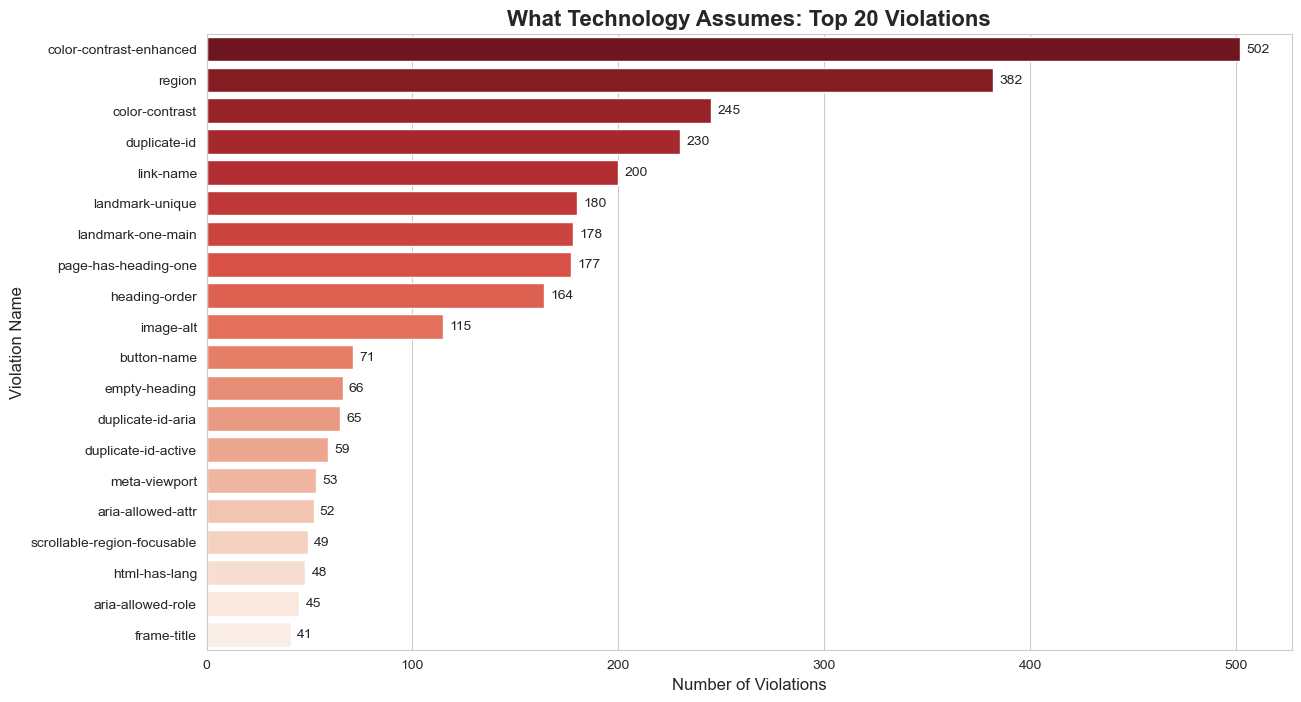

In [36]:
# Load the data
df_top = pd.read_csv('../data/q1_top_violations.csv')

ax = sns.barplot(
    x='count',
    y='violation_name',
    data=df_top.head(20),
    palette='Reds_r',
    legend=False
)

for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 3,
        p.get_y() + p.get_height()/2,
        '{:1.0f}'.format(width),
        ha='left',
        va='center'
    )

plt.title('What Technology Assumes: Top 20 Violations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Violations', fontsize=12)
plt.ylabel('Violation Name', fontsize=12)

plt.savefig('../figures/q1_top_violations.png', dpi=300, bbox_inches='tight')
plt.show()

Chart 2: Heatmap

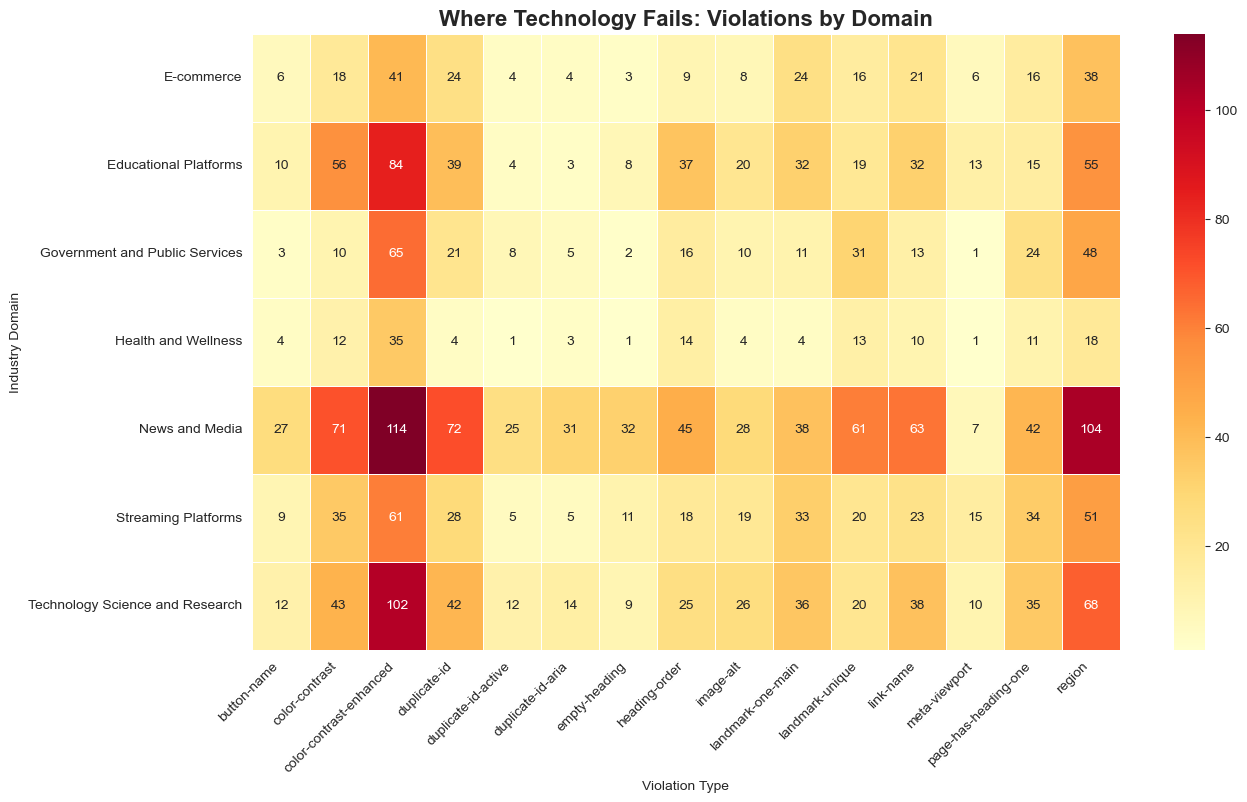

In [37]:
df_heatmap = pd.read_csv('../data/q1_violations_by_domain.csv')
df_heatmap.set_index('domain_category', inplace=True)

sns.heatmap(df_heatmap, annot=True, fmt='d', cmap="YlOrRd", linewidths=.5)

plt.title('Where Technology Fails: Violations by Domain', fontsize=16, fontweight='bold')
plt.xlabel("Violation Type")
plt.ylabel("Industry Domain")
plt.xticks(rotation=45, ha='right')

plt.savefig('../figures/q1_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Chart 3: Category Pie

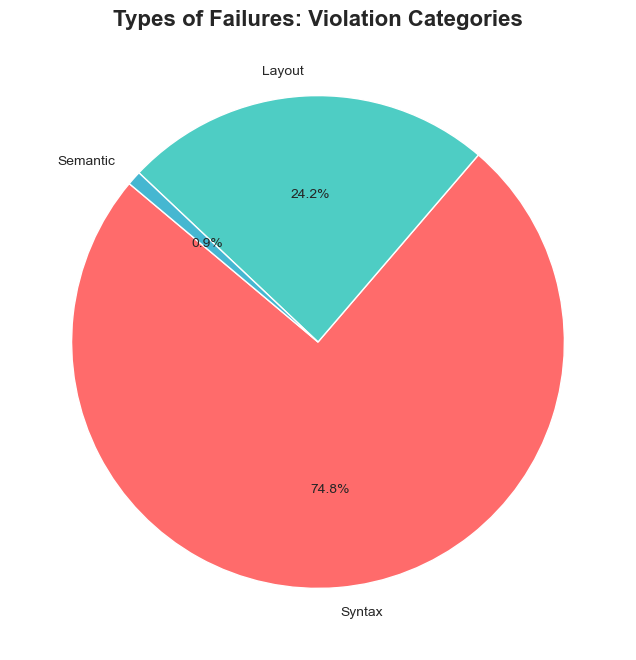

In [38]:
df_cat = pd.read_csv('../data/q1_category_breakdown.csv')

cat_colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']

plt.pie(
    df_cat['count'],
    labels=df_cat['violation_category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=cat_colors
)

plt.title("Types of Failures: Violation Categories", fontsize=16, fontweight='bold')

plt.savefig('../figures/q1_categories.png', dpi=300, bbox_inches='tight')
plt.show()

Chart 4: Impact Severity

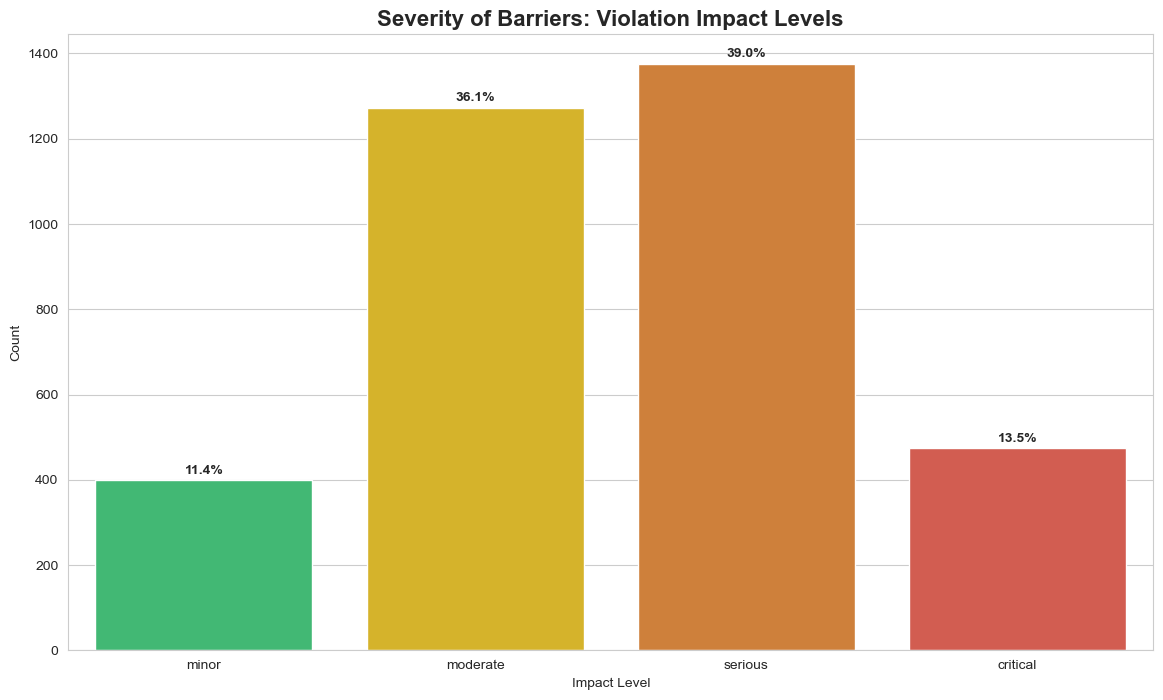

In [39]:
df_impact = pd.read_csv('../data/q1_impact_breakdown.csv')

impact_order = ['minor', 'moderate', 'serious', 'critical']
df_impact['violation_impact'] = pd.Categorical(df_impact['violation_impact'], categories=impact_order, ordered=True)
df_impact = df_impact.sort_values('violation_impact')

severity_palette = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']

ax = sns.barplot(
    x='violation_impact',
    y='count',
    data=df_impact,
    hue='violation_impact',
    palette=severity_palette,
    legend=False
)

total_count = df_impact['count'].sum()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.text(p.get_x() + p.get_width()/2., height + 15,
            '{:1.1f}%'.format(percentage),
            ha="center",
            fontweight='bold')

plt.title("Severity of Barriers: Violation Impact Levels", fontsize=16, fontweight='bold')
plt.xlabel("Impact Level")
plt.ylabel("Count")

plt.savefig('../figures/q1_impact.png', dpi=300, bbox_inches='tight')
plt.show()
